Kernel Ridge Regression
===
## PART 1

### Kernel ridge regression
1. Load the data and appropriate libraries
2. Calculate kernel matrix using `kernel_matrix(matrix_1, matrix_2, gamma)` function
3. Calculate Predictions as $$Y^*=K^*(K-\lambda I_N)^{-1}Y$$ where $K^*=k(x*,x)$ and $K=k(x,x)$
4. Calculate RMSE as $\sqrt{\frac{1}{N}\left( ||y_{true} - y_{pred}|| \right)^2}$
5. Plot the results for subpart 1 and subpart 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme('notebook')
sns.set_style('white')

TRAIN_FILEPATH = './data/ridgetrain.txt'
TEST_FILEPATH = './data/ridgetest.txt'

ridgetrain = pd.read_csv(TRAIN_FILEPATH, header=None, sep='  ', engine='python')
ridgetest = pd.read_csv(TEST_FILEPATH, header=None, sep='  ', engine='python')

ridgetrain = ridgetrain.sort_values(by=0)
ridgetest = ridgetest.sort_values(by=0)

#### Subpart 1
Predict for Test X values using RBF kernel for $\lambda=0.1$

Text(0.5, 1.0, 'RBF KRR lambda=0.1 RMSE=0.03258')

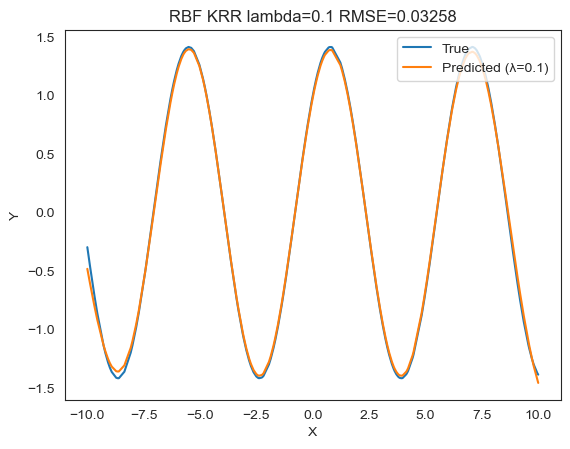

In [2]:
X_TRAIN = ridgetrain[0].values.reshape((-1, 1)) # [N, 1]
Y_TRAIN = ridgetrain[1].values.reshape((-1, 1)) # [N, 1]

X_TEST = ridgetest[0].values.reshape((-1, 1)) # [M, 1]
Y_TEST = ridgetest[1].values.reshape((-1, 1)) # [M, 1]

GAMMA = 0.1

def kernel_matrix(matrix_1, matrix_2, gamma=0.1):
    """Compute the kernel matrix for `matrix_1` and `matrix_2`

    Args:
        matrix_1 : Matrix 1
        matrix_2 : Matrix 2
        gamma : gamma value. Default 0.1

    Returns:
        np.ndarray(shape=[matrix_1.shape[0] , matrix_2.shape[0]]): The kernel matrix after applying rbf kernel
    """
    kernelized_matrix = np.zeros((matrix_1.shape[0], matrix_2.shape[0])) # [M, N]
    for i in range(matrix_1.shape[0]):
        for j in range(matrix_2.shape[0]):
            kernelized_matrix[i, j] = np.exp(-gamma*np.square(matrix_1[i, 0] - matrix_2[j, 0]))
    return kernelized_matrix

K_star = kernel_matrix(X_TEST, X_TRAIN, GAMMA)
K = kernel_matrix(X_TRAIN, X_TRAIN, GAMMA)

LAMBDA = 0.1
IDENTITY = np.identity(X_TRAIN.shape[0])

Y_pred = K_star @ np.linalg.inv(K + (LAMBDA*IDENTITY)) @ Y_TRAIN

def calculate_rmse(Y_true, Y_pred):
    """Calcuate Root Mean Squared error

    Args:
        Y_true : true y values
        Y_pred : predicted y values
    Returns:
        float: Root mean square error value
    """
    return float(np.sqrt(np.mean(np.square(Y_true - Y_pred), axis=0)))

rmse = calculate_rmse(Y_TEST, Y_pred)

plt.plot(X_TEST, Y_TEST, label='True')
plt.plot(X_TEST, Y_pred, label='Predicted (λ=0.1)')
plt.legend(loc='upper right')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'RBF KRR lambda={LAMBDA} RMSE={rmse:.5f}')

#### Subpart 2
Predicting for $\lambda=[0.1, 1, 10, 100]$ and plotting for the same

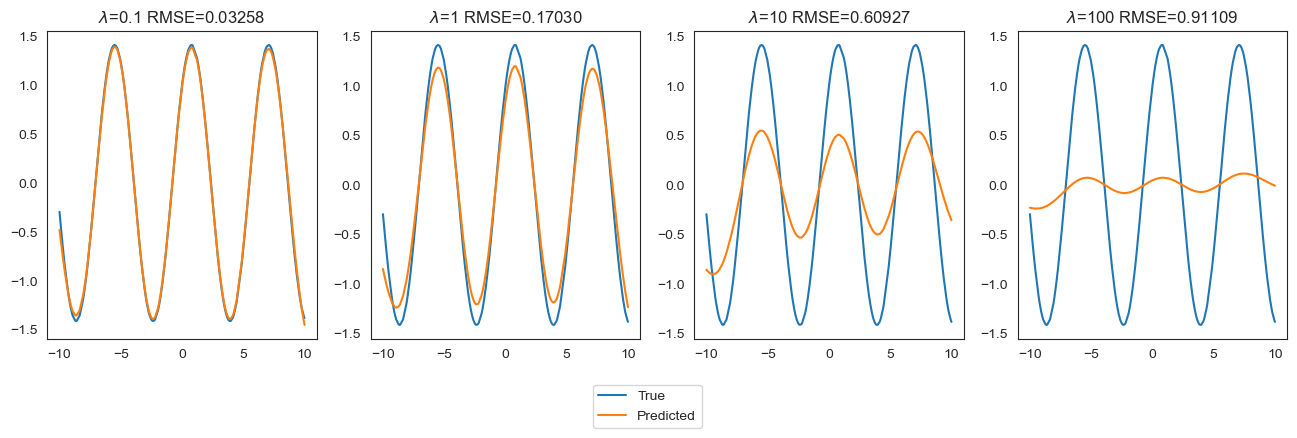

In [4]:
lambdas = [0.1, 1, 10, 100]
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for idx, l in enumerate(lambdas):
    Y_pred = K_star @ np.linalg.inv(K + (l*IDENTITY)) @ Y_TRAIN
    if idx == 0:
        ax[idx].plot(X_TEST, Y_TEST, label='True')
        ax[idx].plot(X_TEST, Y_pred, label='Predicted')
    else:
        ax[idx].plot(X_TEST, Y_TEST)
        ax[idx].plot(X_TEST, Y_pred)
    rmse = calculate_rmse(Y_TEST, Y_pred)
    ax[idx].set_title(rf'$\lambda$={l} RMSE={rmse:.5f}')

fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.13))
# plt.savefig('./hw2/images/kernel-ridge-regression.pdf', bbox_inches='tight')

#### Observation
As we increase the regularization hyperparameter $\lambda$ from $0.1$ to $100$ we see that the predictions are not able to accurately predict the noiseless y-values. Adding regularization makes the model resistant to noise and improves test-accuray, but in this case the y-values in test data are noiseless so it is better to overfit the model to reduce RMSE value.

## PART 2
1. Choosing the landmarks randomly from `ridgetrain` and then using the same to predict output values in `ridgetest`
2. Taking $L$ values from $[2,5, 20, 50, 100]$ with fixed $\lambda=0.1$
3. Choosing the best value of $L$

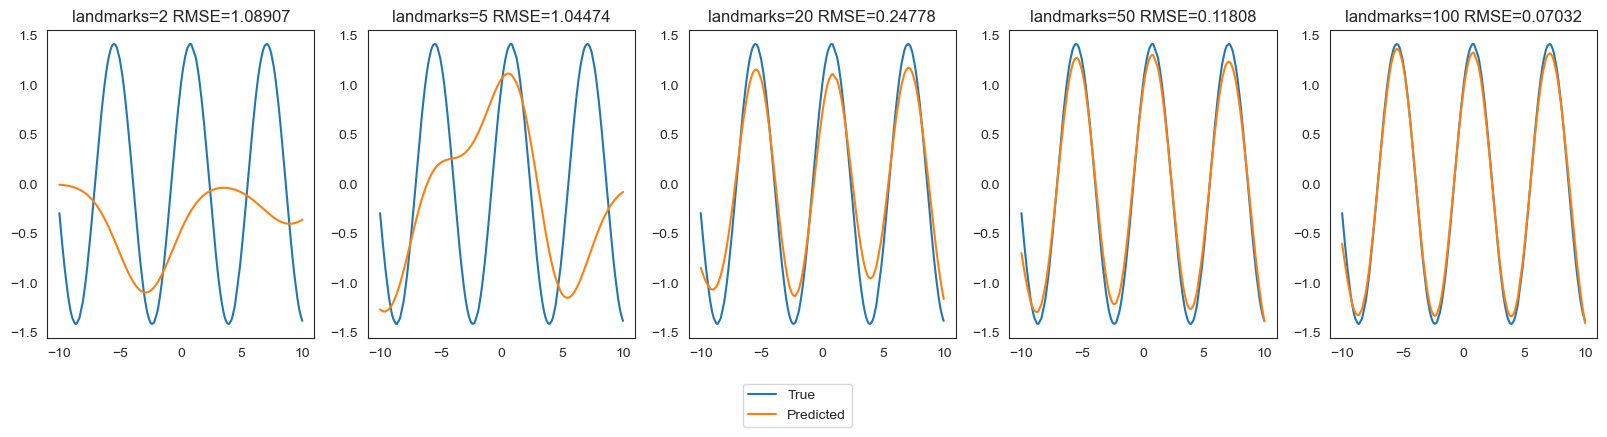

In [5]:
N_LANDMARKS = [2,5,20,50,100]
LAMBDA = 0.1

fig, ax = plt.subplots(1, 5, figsize=(20, 4))

np.random.seed(42)
for idx, landmark in enumerate(N_LANDMARKS):
    indices = np.random.uniform(0, len(X_TRAIN), landmark).astype('int')
    X_L_TRAIN = X_TRAIN[indices,:]
    Y_L_TRAIN = Y_TRAIN[indices,:]
    
    K_star = kernel_matrix(X_TEST, X_L_TRAIN, GAMMA)
    K = kernel_matrix(X_L_TRAIN, X_L_TRAIN, GAMMA)
    IDENTITY = np.identity(X_L_TRAIN.shape[0])
    
    Y_pred = K_star @ np.linalg.inv(K + (LAMBDA*IDENTITY)) @ Y_L_TRAIN
    rmse = calculate_rmse(Y_TEST, Y_pred)
    
    if idx == 0:
        ax[idx].plot(X_TEST, Y_TEST, label='True')
        ax[idx].plot(X_TEST, Y_pred, label='Predicted')
    else:
        ax[idx].plot(X_TEST, Y_TEST)
        ax[idx].plot(X_TEST, Y_pred)
    ax[idx].set_title(f'landmarks={landmark} RMSE={rmse:.5f}')
    
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.13))  
# plt.savefig('./hw2/images/landmark-kernel-ridge-regression.pdf', bbox_inches='tight')

#### Observation
As the number of Landmark points increases the regression model starts to predict the model in a better way, the RMSE reduces.